In [1]:
%load_ext tensorboard

In [5]:
import os
import cv2
import glob as glob
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
os.system('rm -rf ./logs/')

1

In [15]:
data_dir = "D:\music_genre_recognition\Data\images_original"
#data_dir = Path(r"D:\音乐与人工智能\Data\images_original").resolve().as_posix().encode('utf-8')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\26630\AppData\Local\Temp\ipykernel_33784\2955212742.py:1: SyntaxWarning: invalid escape sequence '\m'
  data_dir = "D:\music_genre_recognition\Data\images_original"


In [8]:
image_count = len(list(glob.iglob(data_dir + '/**/*.png', recursive=True)))
print(image_count)

999


记录梅尔频谱图数

In [34]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names

Found 999 files belonging to 10 classes.
Using 800 files for training.
Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [35]:
class_names = train_ds.class_names
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

提高性能，Dataset.cache():将数据存到内存或者建立磁盘，读取速度加快。
Dataset.prefetch():模型训练时异步进行数据预处理，减少数据准备时间。

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
  callbacks=[early_stopping, tensorboard_callback]
)

Epoch 1/100


d:\Program Files (x86)\python12\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.1017 - loss: 7.2321 - val_accuracy: 0.1005 - val_loss: 2.9778 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1203 - loss: 2.7174 - val_accuracy: 0.1206 - val_loss: 2.3669 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.1379 - loss: 2.3369 - val_accuracy: 0.1910 - val_loss: 2.2790 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1438 - loss: 2.2959 - val_accuracy: 0.2312 - val_loss: 2.0896 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2085 - loss: 2.2050 - val_accuracy: 0.2864 - val_loss: 2.0310 - learning_rate: 0.0010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1976 - loss: 2.1591 - val_accuracy: 0.2261 - val_loss: 2.1212 - learning_rate: 0.0010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1803 - loss: 2.1583 - val_accuracy: 0.211

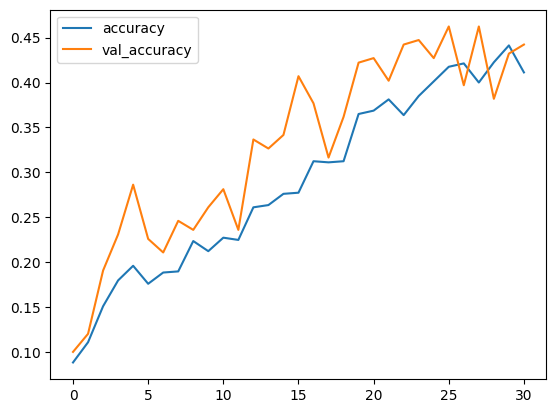

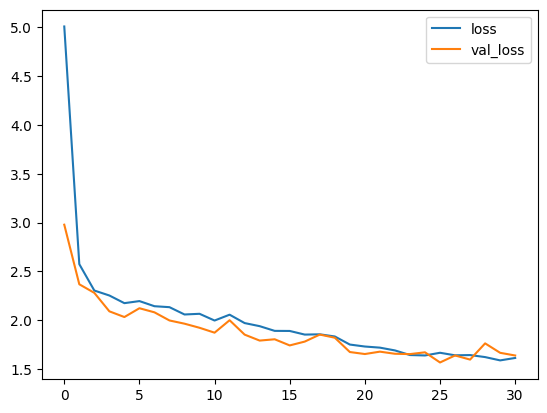

In [33]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()